Apply Vector AutoRegression (VAR) model to check if two series have an effect on one another. Compare personal consumption expenditures and M2 money stock. VAR models in general describe the dependencies between multiple variables and are particularly used in economics for studying endogenous variables together.  

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

df = pd.read_csv('/content/M2SLMoneyStock.csv', index_col=0, parse_dates=True)
sp = pd.read_csv('/content/PCEPersonalSpending.csv', index_col=0, parse_dates=True)

df.index.freq='MS'
sp.index.freq='MS'

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [3]:
sp.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [4]:
df = df.join(sp)

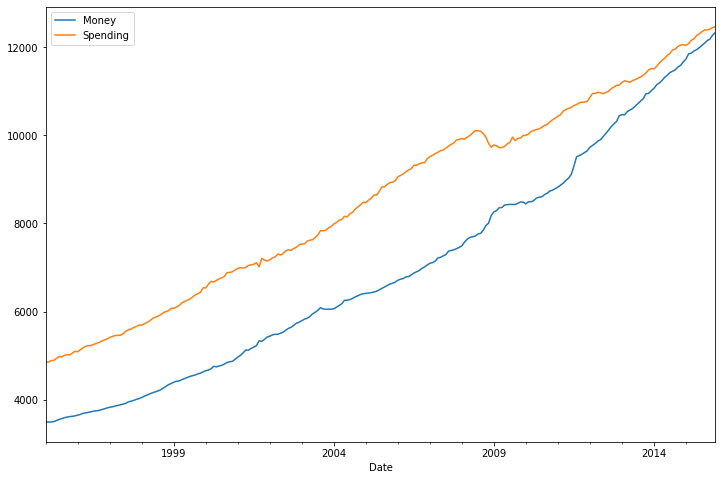

In [6]:
df.plot(figsize=(12, 8))

In [7]:
def adf_test(series, title=''):
  print(f'ADF: {title}')
  result = adfuller(series.dropna(), autolag='AIC')
  labels = ['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations']
  out = pd.Series(result[0:4], index=labels)

  for key, val in result[4].items():
    out[f'critical value ({key})'] = val
  
  print(out.to_string())

  if result[1] <= 0.05:
    print('Reject null hypothesis since data has no unit root and is stationary')
  else:
    print('Failed to reject the null hypothesis since data has unit root and is non-stationary')

Check for stationarity, ensure both series have same differencing if needed incase of non-stationarity

In [8]:
adf_test(df['Money'])

ADF: 
ADF Test Statistic        4.239022
p-value                   1.000000
# Lags Used               4.000000
# Observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Failed to reject the null hypothesis since data has unit root and is non-stationary


In [9]:
adf_test(df['Spending'])

ADF: 
ADF Test Statistic        0.149796
p-value                   0.969301
# Lags Used               3.000000
# Observations          248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
Failed to reject the null hypothesis since data has unit root and is non-stationary


In [10]:
df_transformed = df.diff()

In [11]:
adf_test(df_transformed['Money'])

ADF: 
ADF Test Statistic       -2.057404
p-value                   0.261984
# Lags Used              15.000000
# Observations          235.000000
critical value (1%)      -3.458487
critical value (5%)      -2.873919
critical value (10%)     -2.573367
Failed to reject the null hypothesis since data has unit root and is non-stationary


In [12]:
adf_test(df_transformed['Spending'])

ADF: 
ADF Test Statistic     -7.226974e+00
p-value                 2.041027e-10
# Lags Used             2.000000e+00
# Observations          2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
Reject null hypothesis since data has no unit root and is stationary


In [13]:
df_transformed = df_transformed.diff().dropna()

In [14]:
adf_test(df_transformed['Money'])

ADF: 
ADF Test Statistic     -7.077471e+00
p-value                 4.760675e-10
# Lags Used             1.400000e+01
# Observations          2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
Reject null hypothesis since data has no unit root and is stationary


In [15]:
adf_test(df_transformed['Spending'])

ADF: 
ADF Test Statistic     -8.760145e+00
p-value                 2.687900e-14
# Lags Used             8.000000e+00
# Observations          2.410000e+02
critical value (1%)    -3.457779e+00
critical value (5%)    -2.873609e+00
critical value (10%)   -2.573202e+00
Reject null hypothesis since data has no unit root and is stationary


Based on ADF, use order two differencing for dataset

In [16]:
# Number of observations
nobs = 12

In [17]:
train = df_transformed[:-nobs]
test = df_transformed[-nobs:]

Perform grid search to compute AR order of VAR model

In [20]:
model = VAR(train)

for p in range(8):
  results = model.fit(p)
  print(f'ORDER {p}')
  print(f'AIC: {results.aic}')

ORDER 0
AIC: 14.74710921809045
ORDER 1
AIC: 14.178610495220896
ORDER 2
AIC: 13.955189367163705
ORDER 3
AIC: 13.849518291541038
ORDER 4
AIC: 13.827950574458281
ORDER 5
AIC: 13.78730034460964
ORDER 6
AIC: 13.799076756885809
ORDER 7
AIC: 13.797638727913972
